# VistaMilk data challenge

#### Adaptation on Antonio's code

## Data description
Data used in this study originated from Teagasc Moorepark Dairy Research Farm (Fermoy, Co. Cork, Ireland) between May and August in 2015, 2016, and 2017. A total of 120 HolsteinFriesian cows from different parities were involved in the experiment across the years, with a mean number of 36 samples per cow, and with some of the cows participating in the experiment in more than 1 yr. Each year, 54 cows were randomly assigned to different dietary treatments for the entire lactation period. The treatment diets included grass (GRS), which consisted of cows maintained outdoors on a perennial ryegrass sward only, clover (CLV), where cows were maintained outdoors on a perennial ryegrass white clover sward (with an annual average clover content of 20%) only, and TMR, where cows were maintained indoors and fed with a single nutritional mix containing grass silage, maize silage, and concentrates. Further information on the experimental design and dietary treatments have been described by O’Callaghan et al. (2016). The cows were milked twice daily (0730 and 1530 h), and a.m. and p.m. milk samples were collected once weekly from consecutive milkings and analysed by a Pro-Foss FT6000 (FOSS). A total of 4,364 milk spectra were stored, comprising 1,060 wavelengths in the region from 925 cm−1 and 5,010 cm−1. The wavelengths values were recorded as transmittance values.

## tl;dr
This is a classification problem where 3 classes are targeted:

- GRS
- CLV
- TMR

Data are sampled from 54 cows across 3 years. Each data points contain 1060 wavelengths within a specified light region.

In [1]:
import sys
import importlib

from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.insert(0, '..')
from src import utils

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from PIL import Image

importlib.reload(utils)

<module 'src.utils' from '../src/utils.py'>

In [2]:
# read data in
# make the conversion only one as the xlsx files take forever to load
full_data = Path('..', 'data', 'full_dataset.xlsx')
train_path = Path('..', 'data', 'raw_train.csv')
test_path = Path('..', 'data', 'raw_test.csv')

train_df = utils.read_raw_data(full_data, train_path, 0)
test_df = utils.read_raw_data(full_data, test_path, 1)

In [3]:
no_samples = train_df.shape[0]
no_features = train_df.shape[1] - 1

print(f'Total samples: {no_samples}')
print(f'Total features: {no_features}')

Total samples: 3275
Total features: 1060


train_df.head(10)

test_df.head(10)

train_df.describe().T

test_df.describe().T

f = utils.plot_wave(train_df.iloc[10], target_col='Diet')
f.show()

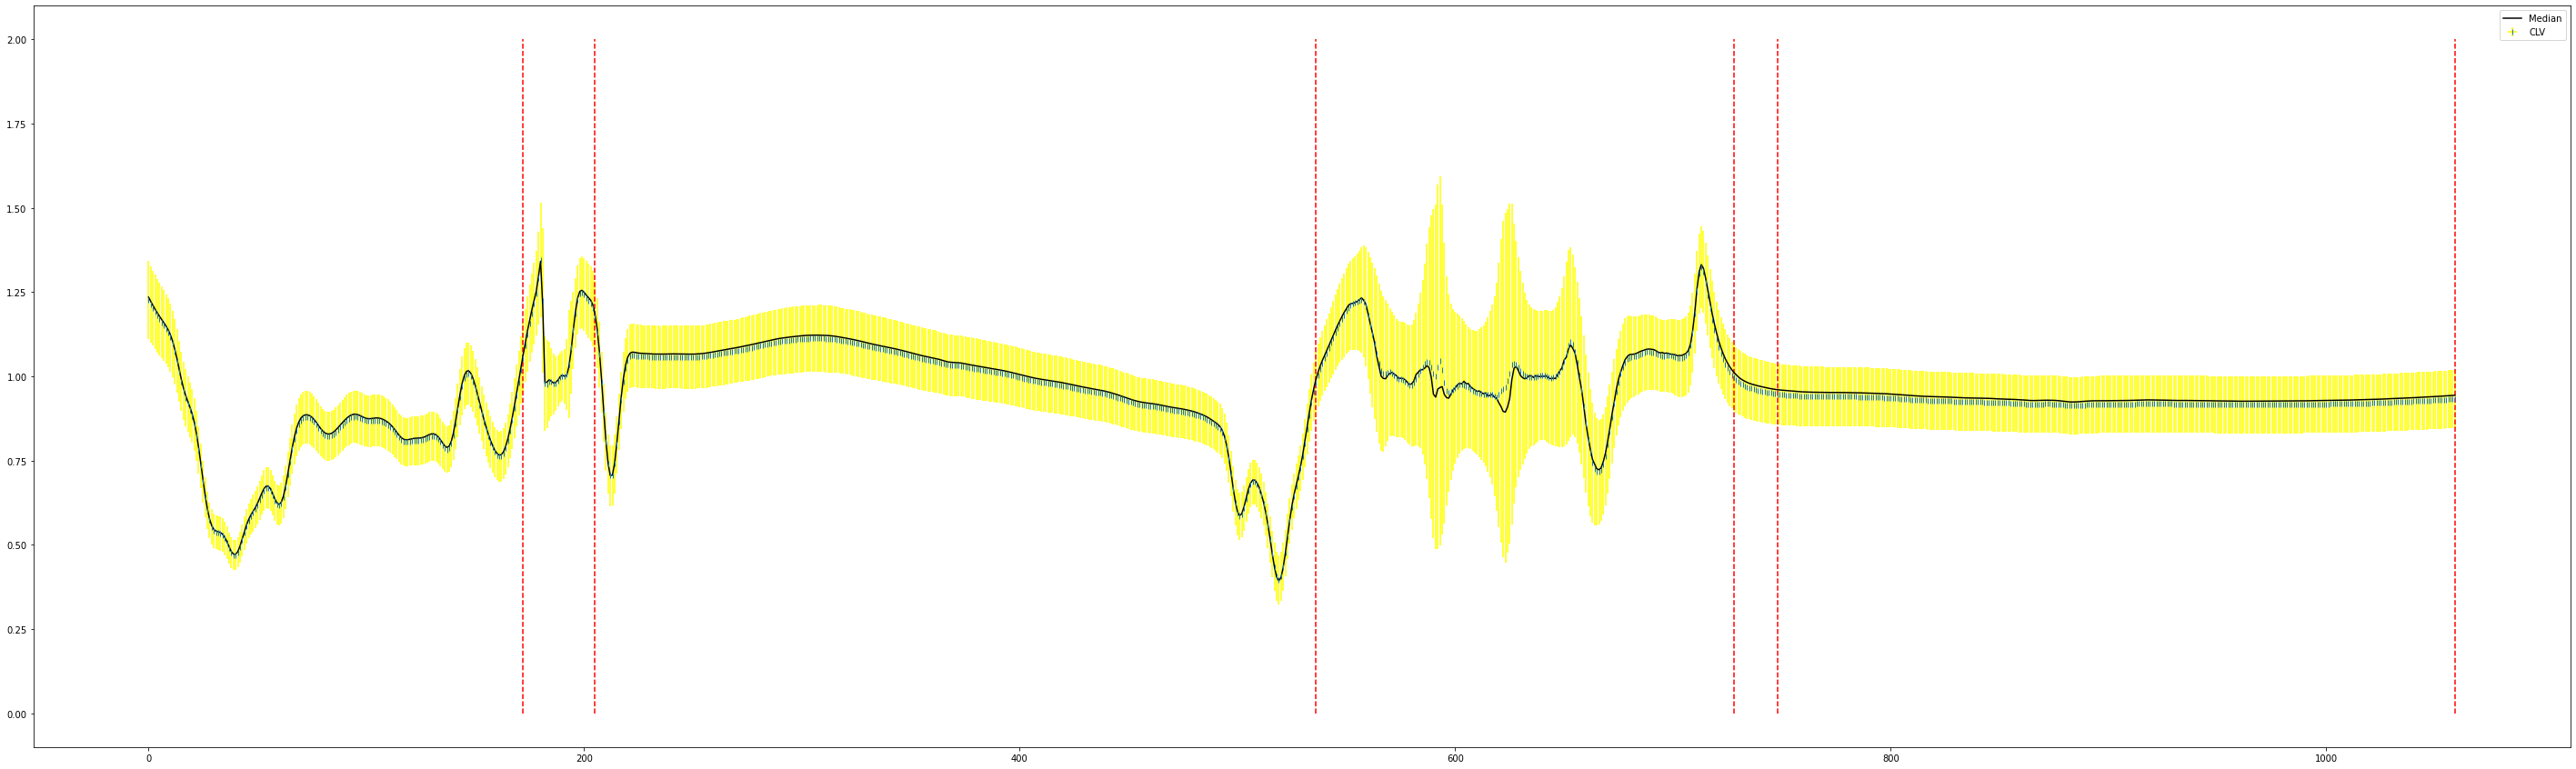

In [4]:
clv = train_df[train_df['Diet'] == 'CLV'].drop(['Diet'], axis=1)

# grs = train_df[train_df['Diet'] == 'GRS'].drop(['Diet'], axis=1)
# grs_centroid = np.mean(grs.values, axis=0)

# tmr = train_df[train_df['Diet'] == 'TMR'].drop(['Diet'], axis=1)
# tmr_centroid = np.mean(grs.values, axis=0)
fig = plt.figure(figsize=(50, 15))
plt.errorbar(x=range(len(np.mean(clv.values, axis=0))),y=np.mean(clv.values, axis=0),
             xerr=0,yerr=1*np.std(clv.values, axis=0),fmt='|',ecolor='yellow', label='CLV')



plt.plot(np.median(clv.values, axis=0), label='Median', color='black')
plt.vlines(172, ymin=0, ymax=2, color='red', linestyle='--')
plt.vlines(205, ymin=0, ymax=2, color='red', linestyle='--')

plt.vlines(536, ymin=0, ymax=2, color='red', linestyle='--')
plt.vlines(728, ymin=0, ymax=2, color='red', linestyle='--')

plt.vlines(748, ymin=0, ymax=2, color='red', linestyle='--')
plt.vlines(1059, ymin=0, ymax=2, color='red', linestyle='--')
#plt.plot(clv_std, label='std')
#plt.plot(clv_std2, label='std')
#plt.plot(tmr_centroid, label='TMR centroid')

# plt.grid()
plt.legend()
plt.show()

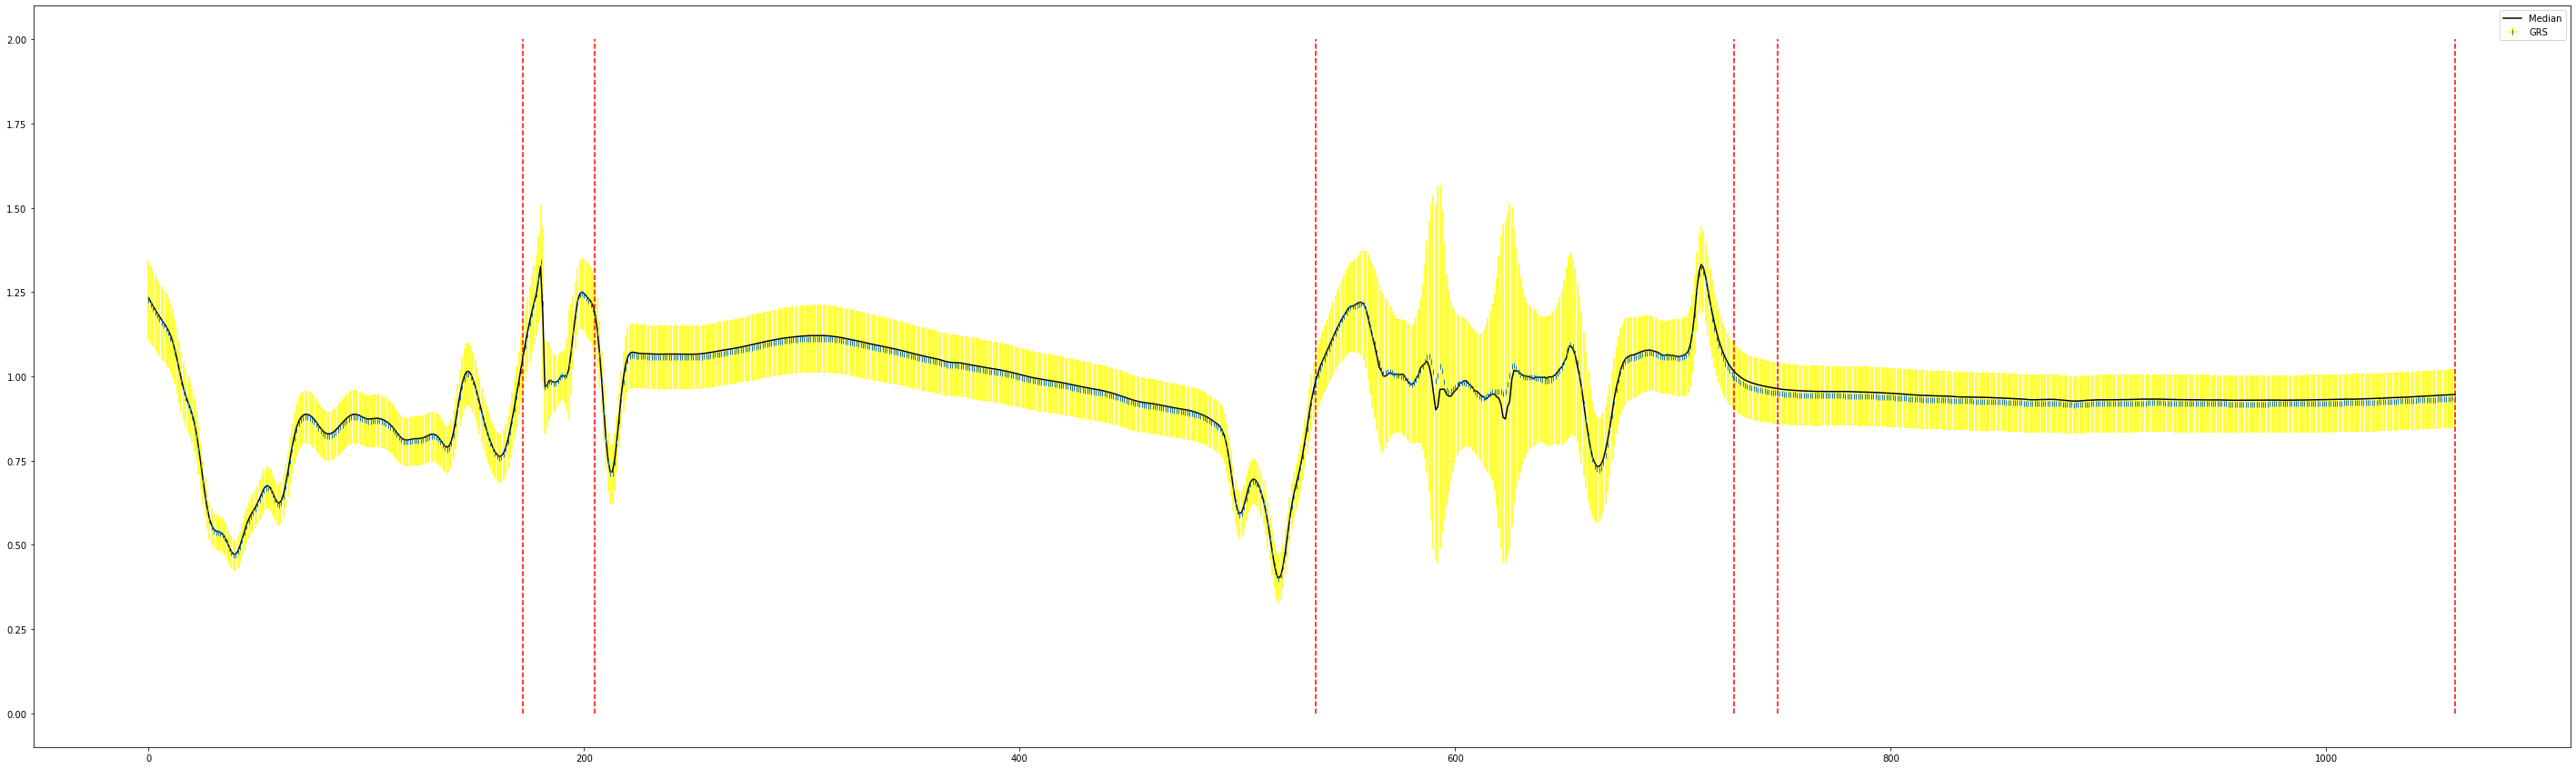

In [5]:
grs = train_df[train_df['Diet'] == 'GRS'].drop(['Diet'], axis=1)
grs_centroid = np.mean(grs.values, axis=0)

# tmr = train_df[train_df['Diet'] == 'TMR'].drop(['Diet'], axis=1)
# tmr_centroid = np.mean(grs.values, axis=0)
fig = plt.figure(figsize=(50, 15))
plt.errorbar(x=range(len(np.mean(grs.values, axis=0))),y=np.mean(grs.values, axis=0),
             xerr=0,yerr=1*np.std(grs.values, axis=0),fmt='|',ecolor='yellow', label='GRS')


plt.plot(np.median(grs.values, axis=0), label='Median', color='black')
plt.vlines(172, ymin=0, ymax=2, color='red', linestyle='--')
plt.vlines(205, ymin=0, ymax=2, color='red', linestyle='--')

plt.vlines(536, ymin=0, ymax=2, color='red', linestyle='--')
plt.vlines(728, ymin=0, ymax=2, color='red', linestyle='--')

plt.vlines(748, ymin=0, ymax=2, color='red', linestyle='--')
plt.vlines(1059, ymin=0, ymax=2, color='red', linestyle='--')
# plt.plot(clv_centroid, label='CLV centroid')
#plt.plot(clv_std, label='std')
#plt.plot(clv_std2, label='std')
#plt.plot(tmr_centroid, label='TMR centroid')

# plt.grid()
plt.legend()
plt.show()

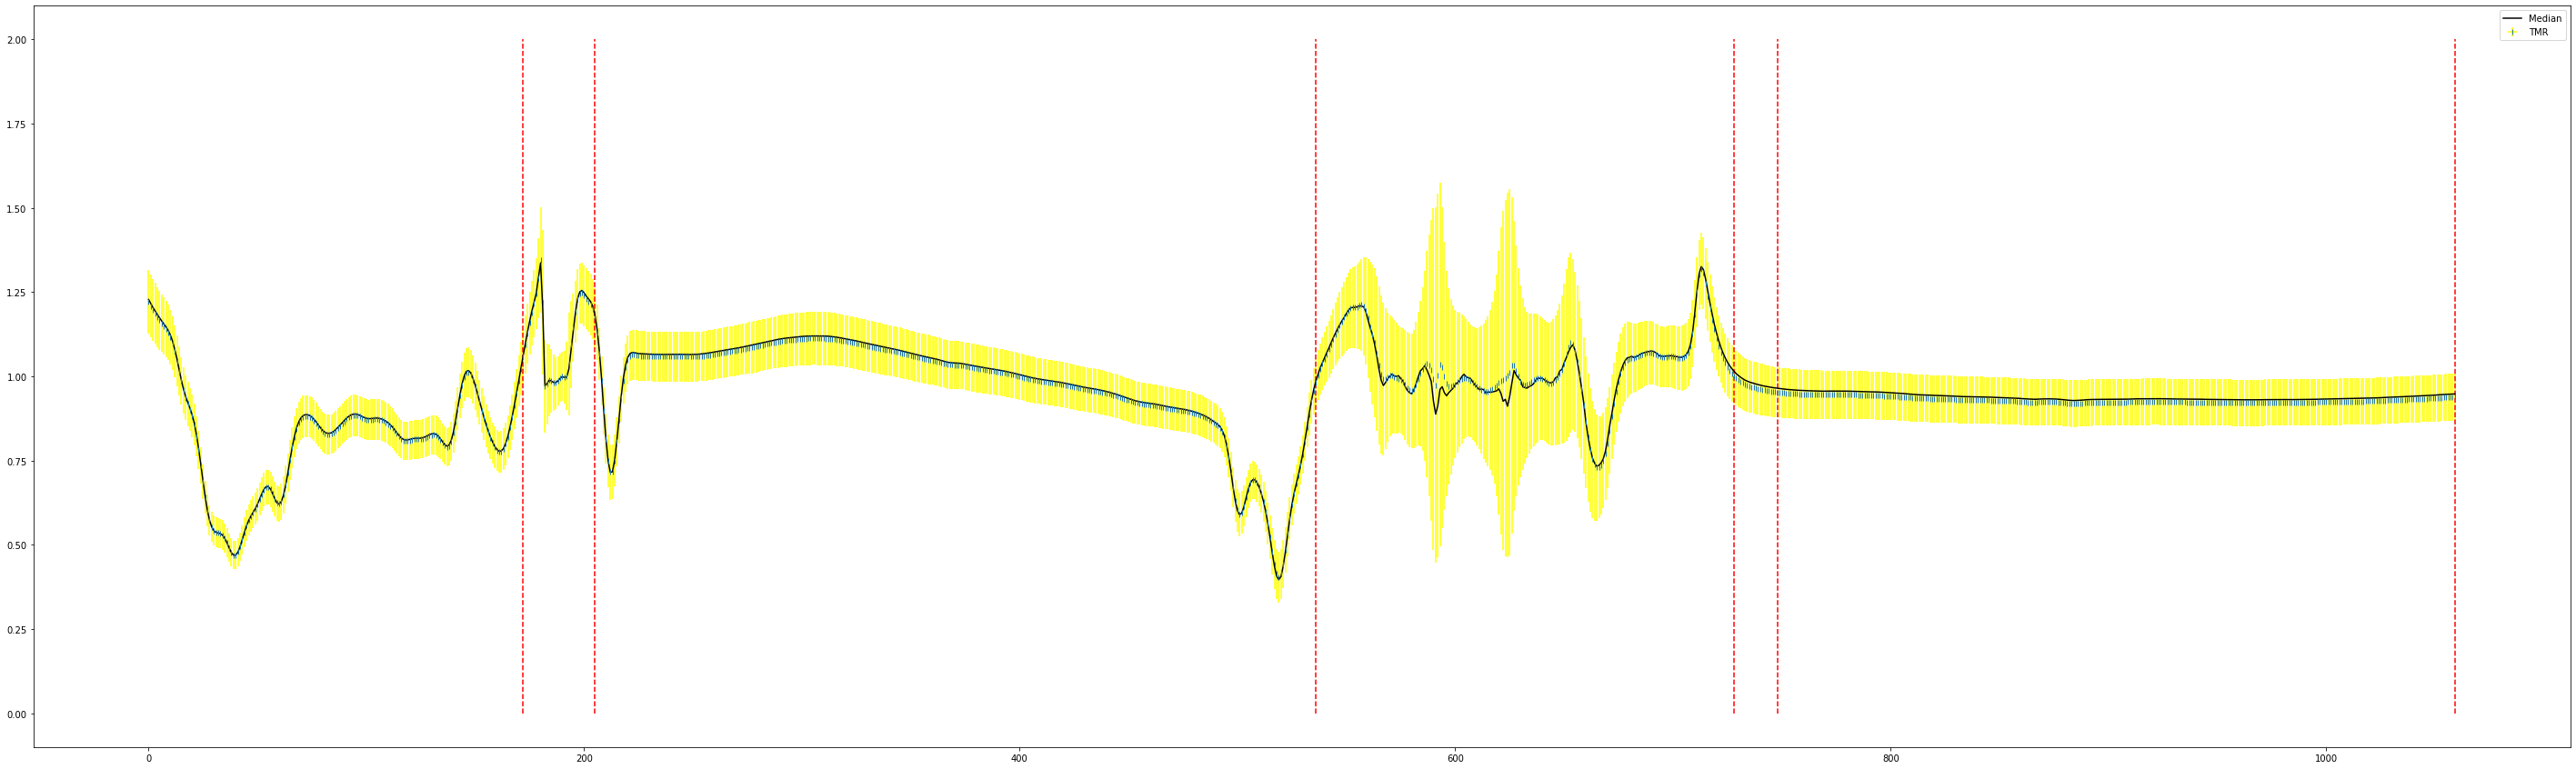

In [6]:
tmr = train_df[train_df['Diet'] == 'TMR'].drop(['Diet'], axis=1)
tmr_centroid = np.mean(grs.values, axis=0)

fig = plt.figure(figsize=(50, 15))
plt.errorbar(x=range(len(np.mean(tmr.values, axis=0))),y=np.mean(tmr.values, axis=0),
             xerr=0,yerr=1*np.std(tmr.values, axis=0),fmt='|',ecolor='yellow', label='TMR')



plt.plot(np.median(tmr.values, axis=0), label='Median', color='black')
plt.vlines(172, ymin=0, ymax=2, color='red', linestyle='--')
plt.vlines(205, ymin=0, ymax=2, color='red', linestyle='--')

plt.vlines(536, ymin=0, ymax=2, color='red', linestyle='--')
plt.vlines(728, ymin=0, ymax=2, color='red', linestyle='--')

plt.vlines(748, ymin=0, ymax=2, color='red', linestyle='--')
plt.vlines(1059, ymin=0, ymax=2, color='red', linestyle='--')
#plt.plot(clv_centroid, label='CLV centroid')
#plt.plot(clv_std, label='std')
#plt.plot(clv_std2, label='std')
#plt.plot(tmr_centroid, label='TMR centroid')

# plt.grid()
plt.legend()
plt.show()

clv = train_df[train_df['Diet'] == 'CLV'].drop(['Diet'], axis=1)
clv_centroid = np.median(clv.values, axis=0)

grs = train_df[train_df['Diet'] == 'GRS'].drop(['Diet'], axis=1)
grs_centroid = np.median(grs.values, axis=0)

tmr = train_df[train_df['Diet'] == 'TMR'].drop(['Diet'], axis=1)
tmr_centroid = np.median(grs.values, axis=0)

fig = plt.figure(figsize=(25, 10))

plt.plot(clv_centroid, label='CLV centroid')
plt.plot(grs_centroid, label='GRS centroid')
plt.plot(tmr_centroid, label='TMR centroid')

plt.grid()
plt.legend()
plt.show()

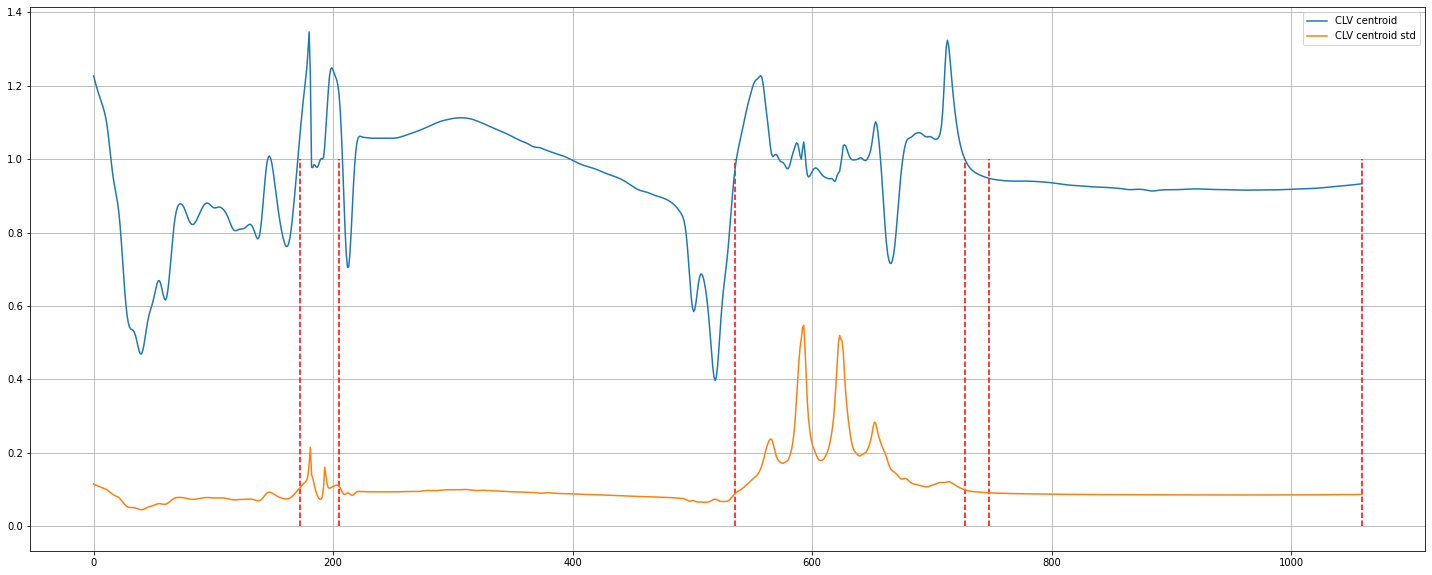

In [7]:
clv = train_df[train_df['Diet'] == 'CLV'].drop(['Diet'], axis=1)
clv_centroid = np.mean(clv.values, axis=0)
clv_centroid_s = np.std(clv.values, axis=0)

grs = train_df[train_df['Diet'] == 'GRS'].drop(['Diet'], axis=1)
grs_centroid = np.std(grs.values, axis=0)

tmr = train_df[train_df['Diet'] == 'TMR'].drop(['Diet'], axis=1)
tmr_centroid = np.std(grs.values, axis=0)

fig = plt.figure(figsize=(25, 10))

plt.plot(clv_centroid, label='CLV centroid')
plt.plot(clv_centroid_s, label='CLV centroid std')
# plt.plot(grs_centroid, label='GRS centroid')
# plt.plot(tmr_centroid, label='TMR centroid')

plt.vlines(172, ymin=0, ymax=1, color='red', linestyle='--')
plt.vlines(205, ymin=0, ymax=1, color='red', linestyle='--')

plt.vlines(536, ymin=0, ymax=1, color='red', linestyle='--')
plt.vlines(728, ymin=0, ymax=1, color='red', linestyle='--')

plt.vlines(748, ymin=0, ymax=1, color='red', linestyle='--')
plt.vlines(1059, ymin=0, ymax=1, color='red', linestyle='--')

plt.grid()
plt.legend()
plt.show()

In [8]:
print(clv_centroid.std())

0.13933784937166047


## Missing values
Check if there are any missing values within the train and the test sets.

In [9]:
total_train_missing = sum(train_df.isnull().sum())
total_test_missing = sum(test_df.isnull().sum())

print(f'Train missing values: {total_train_missing}')
print(f'Test missing values: {total_test_missing}')

Train missing values: 0
Test missing values: 0


## Target variable: `Diet` column

In [10]:
target = train_df['Diet']
unique_target_values = target.unique()
target_stats = {}

for target_value in unique_target_values:
    target_stats[target_value] = {
        'count': train_df[train_df['Diet'] == target_value].shape[0],
        'perc': train_df[train_df['Diet'] == target_value].shape[0] / train_df.shape[0]
    }

print(f'Unique values in the target column: {unique_target_values}')
print()

for t, v in target_stats.items():
    count = v['count']
    perc = v['perc']
    print(f'Target {t}: {count} instances ({perc}% of total)')

Unique values in the target column: ['GRS' 'CLV' 'TMR']

Target GRS: 1094 instances (0.33404580152671753% of total)
Target CLV: 1120 instances (0.3419847328244275% of total)
Target TMR: 1061 instances (0.323969465648855% of total)


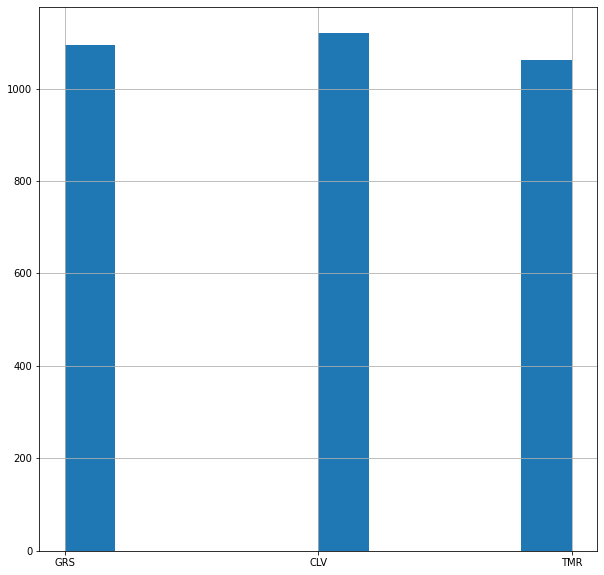

In [11]:
fig = plt.figure(figsize=(10, 10))
plt.hist(target)
plt.grid()
plt.show()

In [12]:
missing_targets = target.isnull().sum()
print(f'Missing labels: {missing_targets}')

Missing labels: 0


## Basic model training
These training examples are based on a stratified 5-fold cross validation.

In [13]:
# data shuffling here: move somewhere else
train_df = train_df.sample(frac=1)

X_train = train_df.drop(['Diet'], axis=1)
y = train_df['Diet']

In [14]:
classifiers = {
    # 'knn': KNeighborsClassifier(),
    # 'ridge': RidgeClassifierCV(alphas=np.logspace(-3, 3, 10)),
    'tree': DecisionTreeClassifier(),
    # 'forest': RandomForestClassifier(),
    # 'SVM': SVC(),
    # 'adaboost': AdaBoostClassifier(),
    # 'mlp': MLPClassifier()
}

for cls_name, classifier in classifiers.items():
    score, pred, report, confusion = utils.basics(classifier, X_train, y)
    
    print(f'[bold underline magenta]{cls_name}[/bold underline magenta]')
    print(f'Scores: {score} (avg. {score.mean()})')
    print(report)
    print(confusion)
    print()

[bold underline magenta]tree[/bold underline magenta]
Scores: [0.4259542  0.41984733 0.44274809 0.43053435 0.40916031] (avg. 0.4256488549618321)
              precision    recall  f1-score   support

         CLV       0.42      0.43      0.42      1090
         GRS       0.42      0.41      0.41      1120
         TMR       0.47      0.46      0.46      1065

    accuracy                           0.43      3275
   macro avg       0.43      0.43      0.43      3275
weighted avg       0.43      0.43      0.43      3275

[[467 357 266]
 [364 455 301]
 [289 282 494]]



## Convolutional approach
Treat the waves as images, then use regular CNNs + FCN to classify them.